Load the libraries.

In [1]:
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt  
import seaborn as sns



In [3]:

# Load the data
Telco_df = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Predicting-Telco-customer-churn\Predicting-Telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [4]:
#show the first 5 rows
Telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#to show the dimension
Telco_df.shape

(7043, 21)

In [6]:
#to show the names of columns
Telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
Telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
Telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This involves removing or imputing missing data or correcting any obvious errors.

In [9]:
# checking for misssing values
Telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the variables.

In [10]:
Telco_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#To show all the categories in the data
for column in Telco_df.columns:
    unique_values = Telco_df[column].unique()
    print(f"{column} : {unique_values}")


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset

In [12]:
Telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


min total charge == o and min monthly  charges = 18.25

In [13]:
# grouping all the colunms
Services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity' , 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
account_information = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure']

Demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

data cleaning

In [14]:
#replace all empty values with zero 
Telco_df["TotalCharges"] = Telco_df["TotalCharges"].replace(" " , "0")
#change the totalcharges from string to float 
Telco_df["TotalCharges"] = Telco_df["TotalCharges"].astype(float)

Drop customerID  from the dataframe.

In [15]:
Telco_df.drop(columns=['customerID'], inplace= True)

In [16]:
Telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
#replacing churn yes and no as an integer.
Telco_df["Churn"] = Telco_df["Churn"].replace({'Yes' : '1' , "No" : '0'}).astype("int")

In [18]:
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
Telco_df[Telco_df["TotalCharges"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0


Include a monthly charge instead of zero

In [20]:
Telco_df.loc[Telco_df['TotalCharges'] == 0, 'TotalCharges'] = Telco_df['MonthlyCharges']

In [21]:
for col in Services:
    Telco_df[col] = Telco_df[col].replace({'No phone service' : 'No' , 'No internet service' : 'No'})

In [22]:
Telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.265370
std,0.368612,24.559481,30.090047,2266.730170,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


we have now described the other variables such as Totalcharges and churn.

In [23]:
#show the count of each type with churn or not 
def Cross_tabulation (Telco_df, col1 , col2):
    cross_tab = pd.crosstab(Telco_df[col1], Telco_df[col2])
    return cross_tab

In [24]:
print(Telco_df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [25]:
result = Cross_tabulation(Telco_df, 'gender', 'SeniorCitizen')
 #Print the result
print(result)

SeniorCitizen     0    1
gender                  
Female         2920  568
Male           2981  574


Demographic variables are as follows, Gender, senior citizen, partner, and dependents.
Service features are 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.
Account information are Contract', 'PaperlessBilling', 'PaymentMethod.

In [26]:
for col in Demographic:
    print (Cross_tabulation(Telco_df, col, 'Churn'))
    print("**************************")

Churn      0    1
gender           
Female  2549  939
Male    2625  930
**************************
Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476
**************************
Churn       0     1
Partner            
No       2441  1200
Yes      2733   669
**************************
Churn          0     1
Dependents            
No          3390  1543
Yes         1784   326
**************************


More senior citizen, less churn: more partner, less churn, more depependents, less churn.

In [27]:
corr = []
name = []
for col in Services:
    name.append(col)
    corr.append(Telco_df[Telco_df[col] == 'Yes'].value_counts().sum())
print(name)
corr

['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


[6361, 2971, 0, 2019, 2429, 2422, 2044, 2707, 2732]

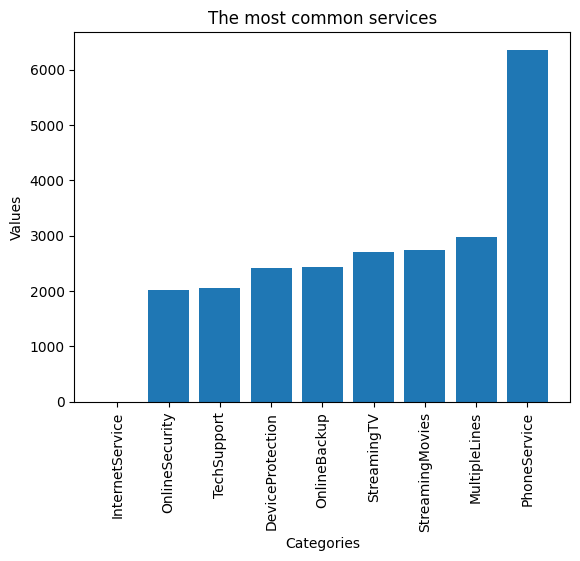

In [28]:
# Create a DataFrame from the data
data = pd.DataFrame({'Categories': name, 'Values': corr})

# Sort the DataFrame by 'Values' column in descending order
df_sorted = data.sort_values(by='Values', ascending=True)

# Create a bar chart
plt.bar(df_sorted['Categories'], df_sorted['Values'])

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('The most common services')

# Rotate x-axis labels
plt.xticks(rotation='vertical');

In [29]:

import seaborn as sns

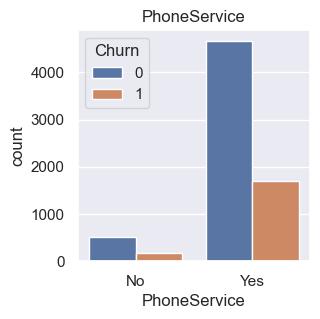

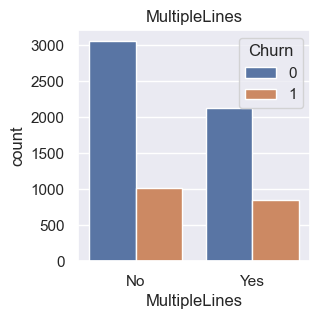

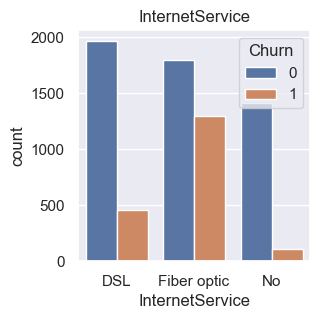

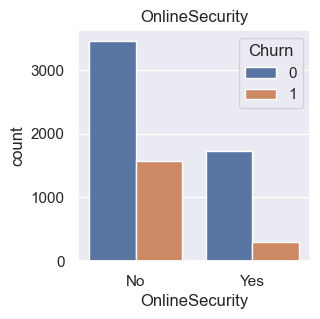

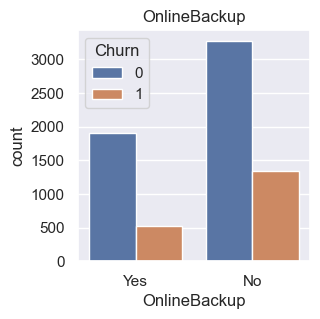

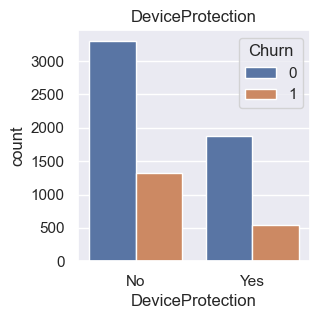

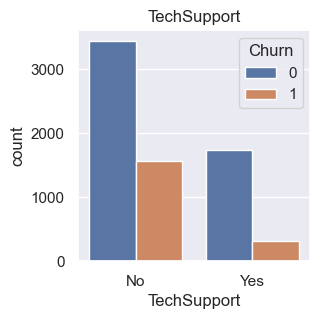

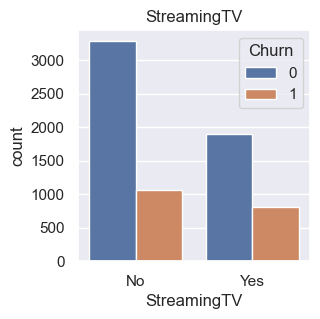

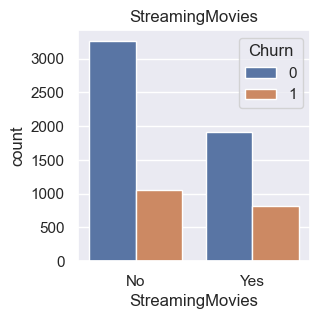

In [30]:
# for every feature plot the churn rate
sns.set(rc={'figure.figsize': (3, 3)}) 
for col in Telco_df.columns:
    if col in Services:
        sns.countplot(x=col, data=Telco_df,hue='Churn').set_title(col)
        plt.show()
        

customer who uses fiber optics has a probability to churn more than other services.

In [31]:
Services

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [32]:
# to create new colunm to show all  servicea for each person
all_services = [0] * 7043 
Telco_df['Services1'] = all_services
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [33]:
for col in Services:
    if col != 'InternetService':
        Telco_df['Services1'] += Telco_df[col].map({"Yes" : 1 , "No" : 0})
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


Text(0.5, 1.0, 'Customer Total in all services')

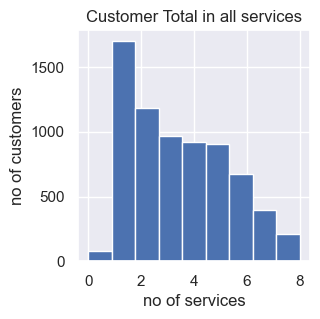

In [34]:
plt.hist(Telco_df['Services1'] , 9)
plt.xlabel("no of services")
plt.ylabel("no of customers")
plt. title("Customer Total in all services")


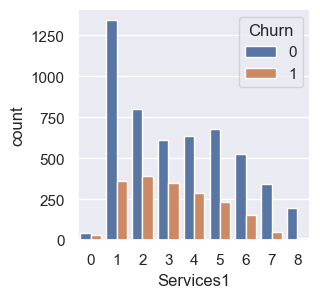

In [35]:
sns.countplot(x='Services1', data=Telco_df,hue='Churn');

Account_Information

In [36]:
Telco_df[account_information].head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,One year,No,Mailed check,56.95,1889.50,34
2,Month-to-month,Yes,Mailed check,53.85,108.15,2
3,One year,No,Bank transfer (automatic),42.30,1840.75,45
4,Month-to-month,Yes,Electronic check,70.70,151.65,2


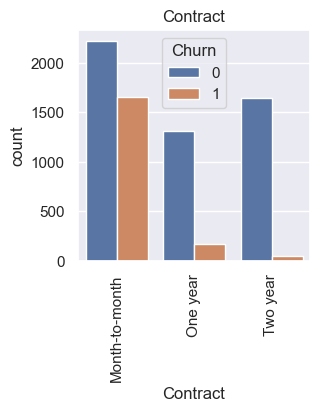

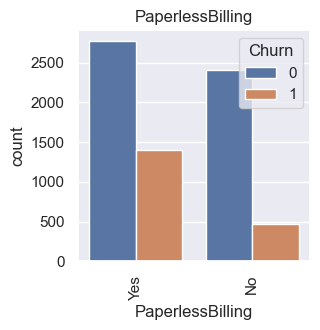

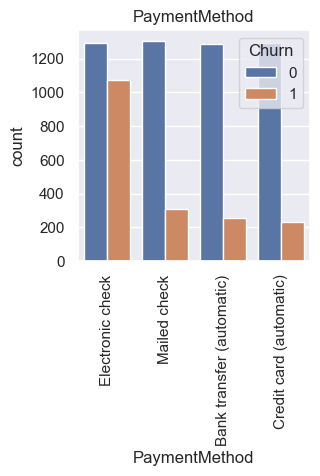

In [37]:
temp = ['Contract' , 'PaperlessBilling' , 'PaymentMethod']
for col in temp:
        sns.countplot(x = col , data = Telco_df , hue = "Churn").set_title(col)
        plt.xticks(rotation='vertical')
        plt.show()

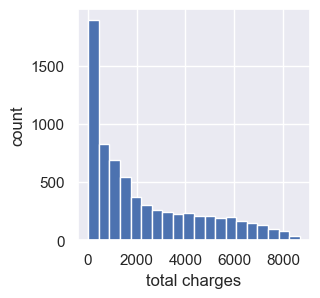

In [38]:
plt.hist(Telco_df['TotalCharges'] , 20);
plt.xlabel('total charges')
plt.ylabel('count')
plt.show();

In [39]:
Telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Services1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.265370,3.362914
std,0.368612,24.559481,30.090047,2266.730170,0.441561,2.062031
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,1.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,3.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,5.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,8.000000


In [40]:
Telco_df[Telco_df['Services1'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
105,Male,0,No,No,5,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,24.30,100.20,0,0
185,Female,0,Yes,No,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,1,0
211,Female,0,No,No,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,25.25,25.25,0,0
272,Male,0,No,No,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),24.80,24.80,1,0
376,Male,0,No,No,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,25.35,25.35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,Male,0,No,No,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,24.40,24.40,0,0
6607,Male,0,No,Yes,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30,1,0
6864,Female,1,No,No,3,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,25.30,77.75,1,0
6979,Male,0,No,Yes,1,No,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,0,0


In [41]:
Telco_df[Telco_df['TotalCharges'] < 100]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
20,Male,1,No,No,1,No,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1,2
22,Male,0,No,No,1,Yes,No,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,1,1
27,Male,0,Yes,Yes,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1,1
33,Male,0,No,No,1,Yes,No,No,No,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,1,2
7016,Female,0,No,No,1,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,0,2
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,1,1
7030,Female,0,No,No,2,Yes,No,No,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,20.05,39.25,0,1


In [42]:
Telco_df[Telco_df['MonthlyCharges'] < 50]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
7,Female,0,No,No,10,No,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1
10,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,0,2
11,Male,0,No,No,16,Yes,No,No,No,No,...,No,No,No,Two year,No,Credit card (automatic),18.95,326.80,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Female,0,No,No,9,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1,1
7029,Female,1,No,No,6,No,No,DSL,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0,2
7030,Female,0,No,No,2,Yes,No,No,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,20.05,39.25,0,1
7037,Female,0,No,No,72,Yes,No,No,No,No,...,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,1


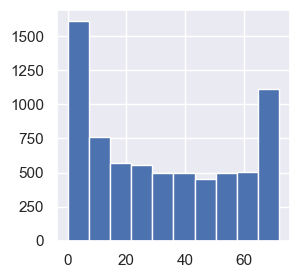

In [43]:
plt.hist(Telco_df['tenure'] , 10);

Preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder 
Telco_df_cat = ['gender', 'Partner' , 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport' , 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# create an instance of the OrdinalEncoder class
lencod = LabelEncoder()

for col in Telco_df_cat:
    Telco_df[col]=lencod.fit_transform(Telco_df[col])

In [45]:
Telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services1
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,0,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,3
2,1,0,0,0,2,1,0,0,1,1,...,0,0,0,0,1,3,53.85,108.15,1,3
3,1,0,0,0,45,0,0,0,1,0,...,1,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [46]:
from sklearn.model_selection import train_test_split

Telco_df.drop(columns = ['Services1'] , inplace = True)

#extract the data 
df_train1 = Telco_df.copy()  #version one  
df_train2 = Telco_df.copy()  #vesion two 

y = df_train1["Churn"]
X = df_train1.drop("Churn" ,axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [47]:
X_train.shape

(5634, 19)

Model building

In [48]:
from sklearn.metrics import confusion_matrix , precision_recall_curve , roc_auc_score , roc_curve,  classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier ,GradientBoostingClassifier

In [49]:
def confusionmatrix(y_test,y_pred):
    #confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

LogisticRegression

In [50]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

c:\Users\layin\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# Make predictions on the testing data
logistic_pred = logistic.predict(X_test)

# Prin classification report
print(classification_report(y_test, logistic_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.75      1409
weighted avg       0.81      0.82      0.81      1409

